In [1]:
import torch
from torch import nn

1. Collect data
2. Build a model
3. Fit the model to data
4. Do inference
5. Save model
   

In [2]:
import matplotlib.pyplot as plt

Y = mx + b

In [3]:
weight = 0.7
bias = 0.3

start = 0 
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
y,X

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960],
         [0.5100],
         [0.5240],
         [0.5380],
         [0.5520],
         [0.5660],
         [0.5800],
         [0.5940],
         [0.6080],
         [0.6220],
         [0.6360],
         [0.6500],
         [0.6640],
         [0.6780],
         [0.6920],
         [0.7060],
         [0.7200],
         [0.7340],
         [0.7480],
         [0.7620],
         [0.7760],
         [0.7900],
         [0.8040],
         [0.8180],
         [0.8320],
         [0.8460],
         [0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 tensor([[0.0000],
         [0.0200],
         [

### Train and Test

### Generalization: The ability for a machine learning model to perform well on data it hasn't seen before

In [5]:
#create a train/test split
train_split = int(0.8 *len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]


In [6]:
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
  
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")


  plt.legend(prop={"size": 14});

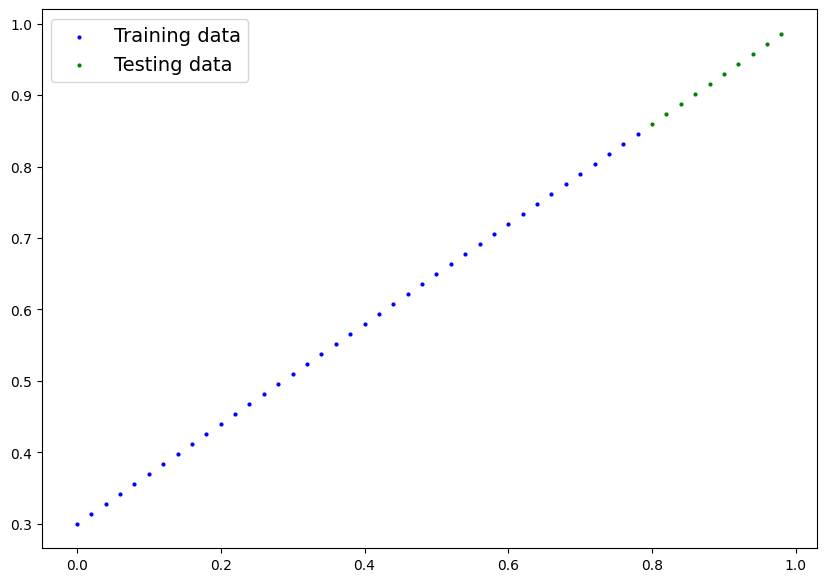

In [8]:
plot_predictions();

### Building a pytorch model


Parameters are Tensor subclasses, that have a very special property when used with Module s - when they’re assigned as Module attributes they are automatically added to the list of its parameters, and will appear e.g. in parameters() iterator. Assigning a Tensor doesn’t have such effect. This is because one might want to cache some temporary state, like last hidden state of the RNN, in the model. If there was no such class as Parameter, these temporaries would get registered too.


In [9]:
#nn.module is the base class for all neural networks modujles
#Modules can also contain other Modules, allowing them to be nested in a tree structure.
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    #Forward pass
    def forward(self, x:torch.Tensor):
        return self.weights *x + self.bias

* torch.nn contains all of the buildings for computational graphs
* torch.nn.Patameter
* torch.nn.Module is the base class
* torch.optim is where the optimizers in Pytorch live that will help with gradient descent. eg.adam
* forward method defines what happens in the forward computation
  

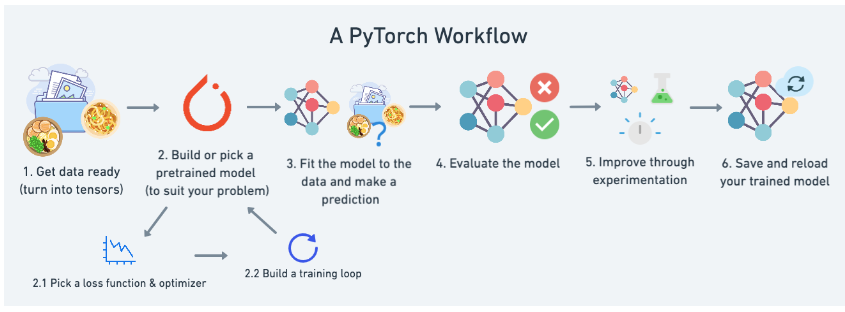

https://www.learnpytorch.io/pytorch_cheatsheet/

In [10]:
torch.manual_seed(42)

model = LinearRegressionModel()

list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [24]:
model.state_dict()

OrderedDict([('weights', tensor([0.7251])), ('bias', tensor([0.1153]))])

## Inference mode turns off gradient

In [12]:
#Doing inference

with torch.inference_mode():
    y_preds = model(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
print(f"X_test shape: {X_test.shape}")
print(f"y_preds shape: {y_preds.shape}")
print(f"y_preds length: {len(y_preds)}")
print(f"\ny_preds:\n{y_preds}")

X_test shape: torch.Size([10, 1])
y_preds shape: torch.Size([10, 1])
y_preds length: 10

y_preds:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

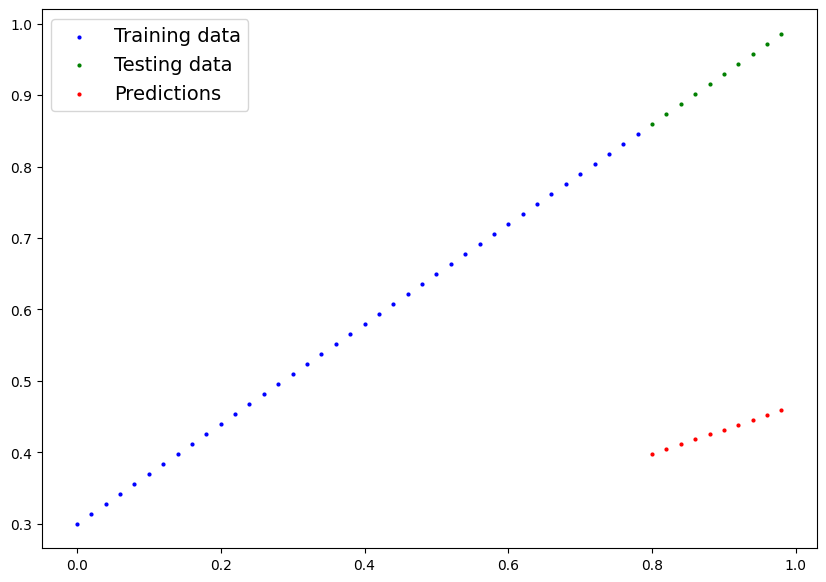

In [15]:
plot_predictions(predictions=y_preds);

## Use a suitable loss functions

In [16]:
#Optimizer applies the gradient descent algorithm 

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model.parameters(),lr=0.01)



### Building a training and testing loop

* Loop through the data
* Forward pass
* Calculate the loss
* Optimizer zero grad
* Optimizer step

## Optimizer step is back propagation 
https://jrwright.info/introai/slides/16-TrainingNeuralNetworks.pdf


In [21]:
torch.manual_seed(42)
epochs = 100

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred,X_train)
    print(loss)
    optimizer.zero_grad()

    #backpropagation
    loss.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)
    print(test_loss)
    

tensor(0.0896, grad_fn=<MeanBackward0>)
tensor(0.2419)
tensor(0.0893, grad_fn=<MeanBackward0>)
tensor(0.2408)
tensor(0.0889, grad_fn=<MeanBackward0>)
tensor(0.2404)
tensor(0.0886, grad_fn=<MeanBackward0>)
tensor(0.2393)
tensor(0.0882, grad_fn=<MeanBackward0>)
tensor(0.2382)
tensor(0.0879, grad_fn=<MeanBackward0>)
tensor(0.2378)
tensor(0.0875, grad_fn=<MeanBackward0>)
tensor(0.2367)
tensor(0.0872, grad_fn=<MeanBackward0>)
tensor(0.2363)
tensor(0.0868, grad_fn=<MeanBackward0>)
tensor(0.2352)
tensor(0.0865, grad_fn=<MeanBackward0>)
tensor(0.2348)
tensor(0.0862, grad_fn=<MeanBackward0>)
tensor(0.2337)
tensor(0.0858, grad_fn=<MeanBackward0>)
tensor(0.2326)
tensor(0.0855, grad_fn=<MeanBackward0>)
tensor(0.2321)
tensor(0.0851, grad_fn=<MeanBackward0>)
tensor(0.2310)
tensor(0.0848, grad_fn=<MeanBackward0>)
tensor(0.2306)
tensor(0.0844, grad_fn=<MeanBackward0>)
tensor(0.2295)
tensor(0.0841, grad_fn=<MeanBackward0>)
tensor(0.2291)
tensor(0.0838, grad_fn=<MeanBackward0>)
tensor(0.2280)
tensor(0.0

In [25]:
with torch.inference_mode():
    y_preds = model(X_test)


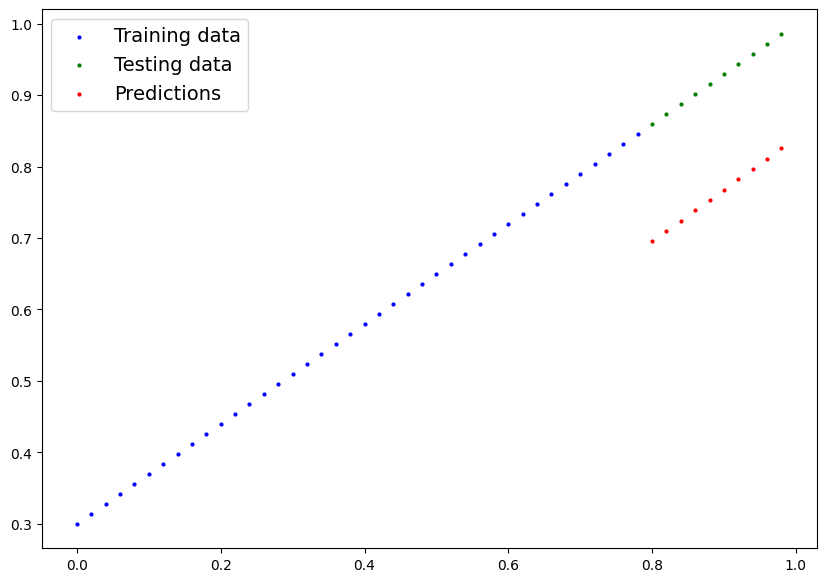

In [26]:
plot_predictions(predictions=y_preds)